# Linear regression on panel-wise sums

In [1]:
import numpy as np
from matplotlib import pylab as plt

In [2]:
import operate_datasets
import model_visualisation
import model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'longitudal')

X_train, y_train, _, _ = operate_datasets.split_dataset(full_X, full_y)

In [4]:
#min_clip = 25
#X_train, y_train = operate_datasets.clip_dataset(X_train, y_train, min_clip)

In [5]:
X_train.shape

(108000, 13)

## Fit regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [6]:
reg_l2 = LinearRegression().fit(X_train, y_train) # positive=True ?
#reg_l1 = Lasso(positive=False).fit(X_train, y_train) # positive=True ???

score_l2 = reg_l2.score(X_train, y_train)

print('L2: ', score_l2)

y_pred_l2 = reg_l2.predict(X_train)

L2:  0.2794619064669571


## Visualise results

In [7]:
X_sum = X_train.sum(axis=1).reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [20]:
print('y = kx + b')
print('k', reg_l2.coef_)
print('b', reg_l2.intercept_)

y = kx + b
k [ 2.37453900e-05  2.66520601e-05  1.87849840e-05  1.46676572e-05
  2.95726879e-06 -1.04996635e-02 -3.98615743e-04  3.20540948e-03
  7.58673324e-03  1.58561342e-02  1.04686900e-04  1.90868126e-04
  3.38656328e-03]
b 0.1405031083691048


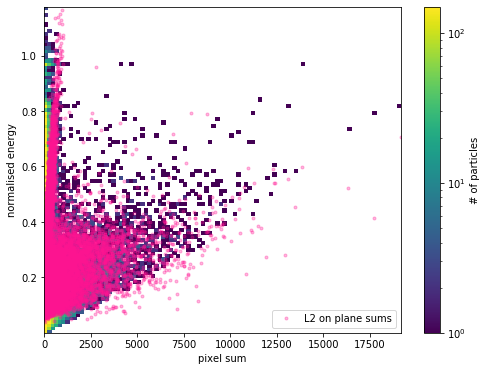

In [9]:
model_visualisation.plot_2d_energy_hist(X_sum, y_train, y_pred_l2, 'L2 on plane sums') 

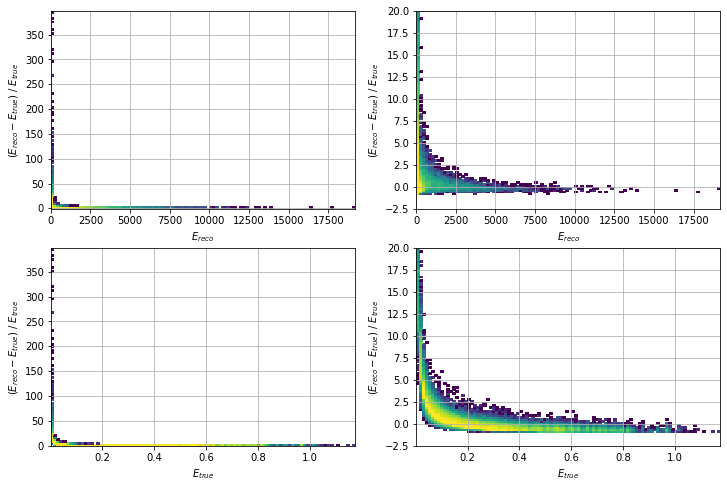

In [13]:
model_visualisation.plot_res_vs_energy(X_sum, y_train, y_pred_l2, vmax=450) 

mean   = 1.49858e+00
std    = 5.83337e+00
median = 2.90495e-01


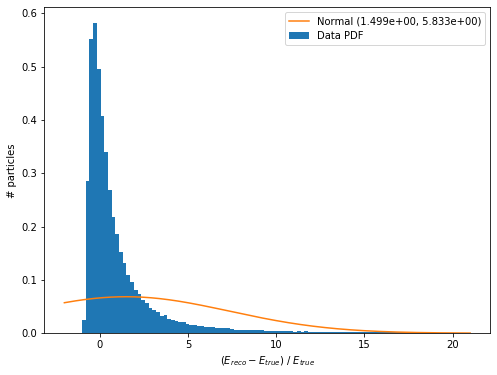

In [18]:
model_visualisation.plot_res_hist_fit(y_train, y_pred_l2, (-1, 20))

In [16]:
model_evaluation.get_scores(y_train, y_pred_l2)

explained_variance_score 0.279461906466957
max_error 1.0357048646911893
mean_absolute_error 0.1131076661164705
mean_squared_error 0.023051993246449975
mean_squared_log_error 0.013506122982432268
median_absolute_error 0.09254816845253719
r2_score 0.2794619064669571


{'explained_variance_score': 0.279461906466957,
 'max_error': 1.0357048646911893,
 'mean_absolute_error': 0.1131076661164705,
 'mean_squared_error': 0.023051993246449975,
 'mean_squared_log_error': 0.013506122982432268,
 'median_absolute_error': 0.09254816845253719,
 'r2_score': 0.2794619064669571}